## Library used

In [79]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### DataSet loading

In [80]:
file_path_1 = (r"C:\Users\Santhosh\Desktop\CapstoneProject\Capstone\Resale price prediction\ResaleFlatPricesBasedonRegistrationDateFromMar2012toDec2014.csv")
file_1 = pd.read_csv(file_path_1)
file_1

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2012-03,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,06 TO 10,45.0,Improved,1986,250000.0
1,2012-03,ANG MO KIO,2 ROOM,510,ANG MO KIO AVE 8,01 TO 05,44.0,Improved,1980,265000.0
2,2012-03,ANG MO KIO,3 ROOM,610,ANG MO KIO AVE 4,06 TO 10,68.0,New Generation,1980,315000.0
3,2012-03,ANG MO KIO,3 ROOM,474,ANG MO KIO AVE 10,01 TO 05,67.0,New Generation,1984,320000.0
4,2012-03,ANG MO KIO,3 ROOM,604,ANG MO KIO AVE 5,06 TO 10,67.0,New Generation,1980,321000.0
...,...,...,...,...,...,...,...,...,...,...
52198,2014-12,YISHUN,5 ROOM,816,YISHUN ST 81,10 TO 12,122.0,Improved,1988,580000.0
52199,2014-12,YISHUN,EXECUTIVE,325,YISHUN CTRL,10 TO 12,146.0,Maisonette,1988,540000.0
52200,2014-12,YISHUN,EXECUTIVE,618,YISHUN RING RD,07 TO 09,164.0,Apartment,1992,738000.0
52201,2014-12,YISHUN,EXECUTIVE,277,YISHUN ST 22,07 TO 09,152.0,Maisonette,1985,592000.0


In [81]:
file_path_2 = (r"C:\Users\Santhosh\Desktop\CapstoneProject\Capstone\Resale price prediction\ResaleFlatPricesBasedonRegistrationDateFromJan2015toDec2016.csv")
file_2 = pd.read_csv(file_path_2)
file_2

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,64,285000.0
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,63,290000.0
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,64,290000.0
...,...,...,...,...,...,...,...,...,...,...,...
37148,2016-12,YISHUN,5 ROOM,297,YISHUN ST 20,13 TO 15,112.0,Improved,2000,82,488000.0
37149,2016-12,YISHUN,5 ROOM,838,YISHUN ST 81,01 TO 03,122.0,Improved,1987,69,455000.0
37150,2016-12,YISHUN,EXECUTIVE,664,YISHUN AVE 4,10 TO 12,181.0,Apartment,1992,74,778000.0
37151,2016-12,YISHUN,EXECUTIVE,325,YISHUN CTRL,01 TO 03,146.0,Maisonette,1988,70,575000.0


In [82]:
file_path_3 = (r"C:\Users\Santhosh\Desktop\CapstoneProject\Capstone\Resale price prediction\ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv")
file_3 = pd.read_csv(file_path_3)
file_3

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0
...,...,...,...,...,...,...,...,...,...,...,...
181257,2024-06,YISHUN,5 ROOM,502B,YISHUN ST 51,10 TO 12,112.0,Improved,2018,92 years 08 months,738000.0
181258,2024-06,YISHUN,5 ROOM,865,YISHUN ST 81,07 TO 09,122.0,Improved,1988,62 years 10 months,680000.0
181259,2024-06,YISHUN,EXECUTIVE,723,YISHUN ST 71,10 TO 12,146.0,Maisonette,1986,61 years,790000.0
181260,2024-06,YISHUN,EXECUTIVE,826,YISHUN ST 81,10 TO 12,146.0,Maisonette,1988,62 years 08 months,1000000.0


#### Merging the dataset using the concat

In [83]:
df= pd.concat([file_2,file_3], axis= 0)
df.reset_index(drop=True,inplace=True)
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,64,285000.0
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,63,290000.0
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,64,290000.0
...,...,...,...,...,...,...,...,...,...,...,...
218410,2024-06,YISHUN,5 ROOM,502B,YISHUN ST 51,10 TO 12,112.0,Improved,2018,92 years 08 months,738000.0
218411,2024-06,YISHUN,5 ROOM,865,YISHUN ST 81,07 TO 09,122.0,Improved,1988,62 years 10 months,680000.0
218412,2024-06,YISHUN,EXECUTIVE,723,YISHUN ST 71,10 TO 12,146.0,Maisonette,1986,61 years,790000.0
218413,2024-06,YISHUN,EXECUTIVE,826,YISHUN ST 81,10 TO 12,146.0,Maisonette,1988,62 years 08 months,1000000.0


#### Dataset info

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218415 entries, 0 to 218414
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                218415 non-null  object 
 1   town                 218415 non-null  object 
 2   flat_type            218415 non-null  object 
 3   block                218415 non-null  object 
 4   street_name          218415 non-null  object 
 5   storey_range         218415 non-null  object 
 6   floor_area_sqm       218415 non-null  float64
 7   flat_model           218415 non-null  object 
 8   lease_commence_date  218415 non-null  int64  
 9   remaining_lease      218415 non-null  object 
 10  resale_price         218415 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 18.3+ MB


### Checking the null values

In [85]:
df.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
remaining_lease        0
resale_price           0
dtype: int64

In [86]:
df.head(5)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,64,285000.0
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,63,290000.0
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,64,290000.0


### block and street_name is address so we join this in address column

In [87]:
df['address'] = df['block']+''+df['street_name']

In [88]:
# drop the block and street_name columns after creating the address column
df_1 = df.drop(columns=['block', 'street_name'])
df_1

,month,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,address
0,2015-01,ANG MO KIO,3 ROOM,07 TO 09,60.0,Improved,1986,70,255000.0,174ANG MO KIO AVE 4
1,2015-01,ANG MO KIO,3 ROOM,01 TO 03,68.0,New Generation,1981,65,275000.0,541ANG MO KIO AVE 10
2,2015-01,ANG MO KIO,3 ROOM,01 TO 03,69.0,New Generation,1980,64,285000.0,163ANG MO KIO AVE 4
3,2015-01,ANG MO KIO,3 ROOM,01 TO 03,68.0,New Generation,1979,63,290000.0,446ANG MO KIO AVE 10
4,2015-01,ANG MO KIO,3 ROOM,07 TO 09,68.0,New Generation,1980,64,290000.0,557ANG MO KIO AVE 10
...,...,...,...,...,...,...,...,...,...,...
218410,2024-06,YISHUN,5 ROOM,10 TO 12,112.0,Improved,2018,92 years 08 months,738000.0,502BYISHUN ST 51
218411,2024-06,YISHUN,5 ROOM,07 TO 09,122.0,Improved,1988,62 years 10 months,680000.0,865YISHUN ST 81
218412,2024-06,YISHUN,EXECUTIVE,10 TO 12,146.0,Maisonette,1986,61 years,790000.0,723YISHUN ST 71
218413,2024-06,YISHUN,EXECUTIVE,10 TO 12,146.0,Maisonette,1988,62 years 08 months,1000000.0,826YISHUN ST 81


### Changing the datatypes and encoding the values in the columns.

In [89]:
# change the month type
df_1['month']= pd.to_datetime(df_1['month'], format='%Y-%m')

In [90]:
# split the month and year from month column

df_1['year']= df_1['month'].dt.year
df_1['month']= df_1['month'].dt.month

In [91]:
df_1.head()

,month,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,address,year
0,1,ANG MO KIO,3 ROOM,07 TO 09,60.0,Improved,1986,70,255000.0,174ANG MO KIO AVE 4,2015
1,1,ANG MO KIO,3 ROOM,01 TO 03,68.0,New Generation,1981,65,275000.0,541ANG MO KIO AVE 10,2015
2,1,ANG MO KIO,3 ROOM,01 TO 03,69.0,New Generation,1980,64,285000.0,163ANG MO KIO AVE 4,2015
3,1,ANG MO KIO,3 ROOM,01 TO 03,68.0,New Generation,1979,63,290000.0,446ANG MO KIO AVE 10,2015
4,1,ANG MO KIO,3 ROOM,07 TO 09,68.0,New Generation,1980,64,290000.0,557ANG MO KIO AVE 10,2015


In [92]:
df_1['town'].unique()

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT PANJANG', 'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG',
       'CLEMENTI', 'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'PASIR RIS', 'PUNGGOL',
       'QUEENSTOWN', 'SEMBAWANG', 'SENGKANG', 'SERANGOON', 'TAMPINES',
       'TOA PAYOH', 'WOODLANDS', 'YISHUN'], dtype=object)

In [93]:
df_1['town'].nunique()

26

In [94]:
df_1['town'] = LabelEncoder().fit_transform(df_1['town'])
df_1

,month,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,address,year
0,1,0,3 ROOM,07 TO 09,60.0,Improved,1986,70,255000.0,174ANG MO KIO AVE 4,2015
1,1,0,3 ROOM,01 TO 03,68.0,New Generation,1981,65,275000.0,541ANG MO KIO AVE 10,2015
2,1,0,3 ROOM,01 TO 03,69.0,New Generation,1980,64,285000.0,163ANG MO KIO AVE 4,2015
3,1,0,3 ROOM,01 TO 03,68.0,New Generation,1979,63,290000.0,446ANG MO KIO AVE 10,2015
4,1,0,3 ROOM,07 TO 09,68.0,New Generation,1980,64,290000.0,557ANG MO KIO AVE 10,2015
...,...,...,...,...,...,...,...,...,...,...,...
218410,6,25,5 ROOM,10 TO 12,112.0,Improved,2018,92 years 08 months,738000.0,502BYISHUN ST 51,2024
218411,6,25,5 ROOM,07 TO 09,122.0,Improved,1988,62 years 10 months,680000.0,865YISHUN ST 81,2024
218412,6,25,EXECUTIVE,10 TO 12,146.0,Maisonette,1986,61 years,790000.0,723YISHUN ST 71,2024
218413,6,25,EXECUTIVE,10 TO 12,146.0,Maisonette,1988,62 years 08 months,1000000.0,826YISHUN ST 81,2024


In [95]:
df_1['flat_type'].unique()

array(['3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE', '1 ROOM',
       'MULTI-GENERATION'], dtype=object)

In [96]:
df_1['flat_type'].nunique()

7

In [97]:
df_1['flat_type'] = LabelEncoder().fit_transform(df_1['flat_type'])
df_1

,month,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,address,year
0,1,0,2,07 TO 09,60.0,Improved,1986,70,255000.0,174ANG MO KIO AVE 4,2015
1,1,0,2,01 TO 03,68.0,New Generation,1981,65,275000.0,541ANG MO KIO AVE 10,2015
2,1,0,2,01 TO 03,69.0,New Generation,1980,64,285000.0,163ANG MO KIO AVE 4,2015
3,1,0,2,01 TO 03,68.0,New Generation,1979,63,290000.0,446ANG MO KIO AVE 10,2015
4,1,0,2,07 TO 09,68.0,New Generation,1980,64,290000.0,557ANG MO KIO AVE 10,2015
...,...,...,...,...,...,...,...,...,...,...,...
218410,6,25,4,10 TO 12,112.0,Improved,2018,92 years 08 months,738000.0,502BYISHUN ST 51,2024
218411,6,25,4,07 TO 09,122.0,Improved,1988,62 years 10 months,680000.0,865YISHUN ST 81,2024
218412,6,25,5,10 TO 12,146.0,Maisonette,1986,61 years,790000.0,723YISHUN ST 71,2024
218413,6,25,5,10 TO 12,146.0,Maisonette,1988,62 years 08 months,1000000.0,826YISHUN ST 81,2024


In [98]:
df_1['flat_model'].unique()

array(['Improved', 'New Generation', 'Model A', 'Standard', 'Simplified',
       'Premium Apartment', 'Maisonette', 'Apartment', 'Model A2',
       'Type S1', 'Type S2', 'Adjoined flat', 'Terrace', 'DBSS',
       'Model A-Maisonette', 'Premium Maisonette', 'Multi Generation',
       'Premium Apartment Loft', 'Improved-Maisonette', '2-room', '3Gen'],
      dtype=object)

In [99]:
df_1['flat_model'].nunique()

21

In [100]:
df_1['flat_model'] = LabelEncoder().fit_transform(df_1['flat_model'])
df_1

,month,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,address,year
0,1,0,2,07 TO 09,60.0,5,1986,70,255000.0,174ANG MO KIO AVE 4,2015
1,1,0,2,01 TO 03,68.0,12,1981,65,275000.0,541ANG MO KIO AVE 10,2015
2,1,0,2,01 TO 03,69.0,12,1980,64,285000.0,163ANG MO KIO AVE 4,2015
3,1,0,2,01 TO 03,68.0,12,1979,63,290000.0,446ANG MO KIO AVE 10,2015
4,1,0,2,07 TO 09,68.0,12,1980,64,290000.0,557ANG MO KIO AVE 10,2015
...,...,...,...,...,...,...,...,...,...,...,...
218410,6,25,4,10 TO 12,112.0,5,2018,92 years 08 months,738000.0,502BYISHUN ST 51,2024
218411,6,25,4,07 TO 09,122.0,5,1988,62 years 10 months,680000.0,865YISHUN ST 81,2024
218412,6,25,5,10 TO 12,146.0,7,1986,61 years,790000.0,723YISHUN ST 71,2024
218413,6,25,5,10 TO 12,146.0,7,1988,62 years 08 months,1000000.0,826YISHUN ST 81,2024


### Split the storey_range into two, after spliting we can add the columns in the dataset.

In [101]:
df_1[['storey_start', 'storey_end']]= df_1['storey_range'].str.split('TO', expand= True)
df_1

,month,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,address,year,storey_start,storey_end
0,1,0,2,07 TO 09,60.0,5,1986,70,255000.0,174ANG MO KIO AVE 4,2015,07,09
1,1,0,2,01 TO 03,68.0,12,1981,65,275000.0,541ANG MO KIO AVE 10,2015,01,03
2,1,0,2,01 TO 03,69.0,12,1980,64,285000.0,163ANG MO KIO AVE 4,2015,01,03
3,1,0,2,01 TO 03,68.0,12,1979,63,290000.0,446ANG MO KIO AVE 10,2015,01,03
4,1,0,2,07 TO 09,68.0,12,1980,64,290000.0,557ANG MO KIO AVE 10,2015,07,09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
218410,6,25,4,10 TO 12,112.0,5,2018,92 years 08 months,738000.0,502BYISHUN ST 51,2024,10,12
218411,6,25,4,07 TO 09,122.0,5,1988,62 years 10 months,680000.0,865YISHUN ST 81,2024,07,09
218412,6,25,5,10 TO 12,146.0,7,1986,61 years,790000.0,723YISHUN ST 71,2024,10,12
218413,6,25,5,10 TO 12,146.0,7,1988,62 years 08 months,1000000.0,826YISHUN ST 81,2024,10,12


In [102]:
df_1.drop(columns=['storey_range'], inplace= True)
df_1

,month,town,flat_type,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,address,year,storey_start,storey_end
0,1,0,2,60.0,5,1986,70,255000.0,174ANG MO KIO AVE 4,2015,07,09
1,1,0,2,68.0,12,1981,65,275000.0,541ANG MO KIO AVE 10,2015,01,03
2,1,0,2,69.0,12,1980,64,285000.0,163ANG MO KIO AVE 4,2015,01,03
3,1,0,2,68.0,12,1979,63,290000.0,446ANG MO KIO AVE 10,2015,01,03
4,1,0,2,68.0,12,1980,64,290000.0,557ANG MO KIO AVE 10,2015,07,09
...,...,...,...,...,...,...,...,...,...,...,...,...
218410,6,25,4,112.0,5,2018,92 years 08 months,738000.0,502BYISHUN ST 51,2024,10,12
218411,6,25,4,122.0,5,1988,62 years 10 months,680000.0,865YISHUN ST 81,2024,07,09
218412,6,25,5,146.0,7,1986,61 years,790000.0,723YISHUN ST 71,2024,10,12
218413,6,25,5,146.0,7,1988,62 years 08 months,1000000.0,826YISHUN ST 81,2024,10,12


In [103]:
df_1['address'].unique()

array(['174ANG MO KIO AVE 4', '541ANG MO KIO AVE 10',
       '163ANG MO KIO AVE 4', ..., '117ACANBERRA CRES',
       '460DBT BATOK WEST AVE 9', '455ASENGKANG WEST AVE'], dtype=object)

In [104]:
df_1['address'].nunique()

9589

In [105]:
df_1['address']= LabelEncoder().fit_transform(df_1['address'])

In [106]:
df_1.head()

,month,town,flat_type,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,address,year,storey_start,storey_end
0,1,0,2,60.0,5,1986,70,255000.0,1598,2015,07,09
1,1,0,2,68.0,12,1981,65,275000.0,6562,2015,01,03
2,1,0,2,69.0,12,1980,64,285000.0,1430,2015,01,03
3,1,0,2,68.0,12,1979,63,290000.0,5400,2015,01,03
4,1,0,2,68.0,12,1980,64,290000.0,6717,2015,07,09


In [107]:
df_1.dtypes

month                    int32
town                     int32
flat_type                int32
floor_area_sqm         float64
flat_model               int32
lease_commence_date      int64
remaining_lease         object
resale_price           float64
address                  int32
year                     int32
storey_start            object
storey_end              object
dtype: object

In [108]:
df_1['storey_start']= df_1['storey_start'].astype(int)
df_1['storey_end']= df_1['storey_end'].astype(int)

In [109]:
df_1.tail(10)

,month,town,flat_type,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,address,year,storey_start,storey_end
218405,6,25,3,104.0,8,1988,63 years 07 months,590000.0,8958,2024,10,12
218406,6,25,3,84.0,16,1987,62 years 06 months,470000.0,9089,2024,4,6
218407,6,25,4,121.0,5,1988,63 years,630000.0,8604,2024,4,6
218408,6,25,4,113.0,5,2018,92 years 11 months,700000.0,6153,2024,4,6
218409,6,25,4,135.0,8,1995,69 years 09 months,800000.0,3737,2024,10,12
218410,6,25,4,112.0,5,2018,92 years 08 months,738000.0,6041,2024,10,12
218411,6,25,4,122.0,5,1988,62 years 10 months,680000.0,9075,2024,7,9
218412,6,25,5,146.0,7,1986,61 years,790000.0,8268,2024,10,12
218413,6,25,5,146.0,7,1988,62 years 08 months,1000000.0,8852,2024,10,12
218414,6,25,5,146.0,7,1988,62 years 08 months,1000000.0,8852,2024,4,6


### Checking  and handeling the skewness

In [110]:
#remaining_lease as 92 years 11 month like datas

slice_values= []
for i in df_1["remaining_lease"].astype(str):
    j= i.replace("years","")
    k= j.replace("months","")
    m= k.strip()
    n= m.split("  ")
    slice_values.append(n)

In [111]:
remaining_lease_year_month= pd.DataFrame(slice_values, columns=['remaining_lease_year','remaining_lease_month'])

In [112]:
remaining_lease_year_month.head(5)

,remaining_lease_year,remaining_lease_month
0,70,None
1,65,None
2,64,None
3,63,None
4,64,None


In [113]:
remaining_lease_year_month.tail(5)

,remaining_lease_year,remaining_lease_month
218410,92,08
218411,62,10
218412,61,None
218413,62,08
218414,62,08


In [114]:
df_1['remaining_lease_year']= remaining_lease_year_month['remaining_lease_year'].astype(int)
df_1['remaining_lease_month']= remaining_lease_year_month['remaining_lease_month'].apply(lambda x: int(x.split()[0]) if x and x.split()[0].isdigit() else 0)

In [115]:
df_1

,month,town,flat_type,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,address,year,storey_start,storey_end,remaining_lease_year,remaining_lease_month
0,1,0,2,60.0,5,1986,70,255000.0,1598,2015,7,9,70,0
1,1,0,2,68.0,12,1981,65,275000.0,6562,2015,1,3,65,0
2,1,0,2,69.0,12,1980,64,285000.0,1430,2015,1,3,64,0
3,1,0,2,68.0,12,1979,63,290000.0,5400,2015,1,3,63,0
4,1,0,2,68.0,12,1980,64,290000.0,6717,2015,7,9,64,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218410,6,25,4,112.0,5,2018,92 years 08 months,738000.0,6041,2024,10,12,92,8
218411,6,25,4,122.0,5,1988,62 years 10 months,680000.0,9075,2024,7,9,62,10
218412,6,25,5,146.0,7,1986,61 years,790000.0,8268,2024,10,12,61,0
218413,6,25,5,146.0,7,1988,62 years 08 months,1000000.0,8852,2024,10,12,62,8


In [116]:
df_1.drop(columns=['remaining_lease'], inplace= True)
df_1

,month,town,flat_type,floor_area_sqm,flat_model,lease_commence_date,resale_price,address,year,storey_start,storey_end,remaining_lease_year,remaining_lease_month
0,1,0,2,60.0,5,1986,255000.0,1598,2015,7,9,70,0
1,1,0,2,68.0,12,1981,275000.0,6562,2015,1,3,65,0
2,1,0,2,69.0,12,1980,285000.0,1430,2015,1,3,64,0
3,1,0,2,68.0,12,1979,290000.0,5400,2015,1,3,63,0
4,1,0,2,68.0,12,1980,290000.0,6717,2015,7,9,64,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
218410,6,25,4,112.0,5,2018,738000.0,6041,2024,10,12,92,8
218411,6,25,4,122.0,5,1988,680000.0,9075,2024,7,9,62,10
218412,6,25,5,146.0,7,1986,790000.0,8268,2024,10,12,61,0
218413,6,25,5,146.0,7,1988,1000000.0,8852,2024,10,12,62,8


In [117]:
df_1.columns

Index(['month', 'town', 'flat_type', 'floor_area_sqm', 'flat_model',
       'lease_commence_date', 'resale_price', 'address', 'year',
       'storey_start', 'storey_end', 'remaining_lease_year',
       'remaining_lease_month'],
      dtype='object')

#### Rearrange the columns

In [118]:
df_2 = df_1[['year','month','town','flat_type','floor_area_sqm','flat_model','address','storey_start','storey_end','remaining_lease_year','remaining_lease_month','lease_commence_date','resale_price']]

In [119]:
df_2

,year,month,town,flat_type,floor_area_sqm,flat_model,address,storey_start,storey_end,remaining_lease_year,remaining_lease_month,lease_commence_date,resale_price
0,2015,1,0,2,60.0,5,1598,7,9,70,0,1986,255000.0
1,2015,1,0,2,68.0,12,6562,1,3,65,0,1981,275000.0
2,2015,1,0,2,69.0,12,1430,1,3,64,0,1980,285000.0
3,2015,1,0,2,68.0,12,5400,1,3,63,0,1979,290000.0
4,2015,1,0,2,68.0,12,6717,7,9,64,0,1980,290000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
218410,2024,6,25,4,112.0,5,6041,10,12,92,8,2018,738000.0
218411,2024,6,25,4,122.0,5,9075,7,9,62,10,1988,680000.0
218412,2024,6,25,5,146.0,7,8268,10,12,61,0,1986,790000.0
218413,2024,6,25,5,146.0,7,8852,10,12,62,8,1988,1000000.0


In [120]:
df_3 = df_2.sort_values(by=['year','month'])

#### saving the final DataFrame as csv format

In [121]:
df_3.to_csv('Resale_flat_price.csv', index= False)

In [122]:
df_3

,year,month,town,flat_type,floor_area_sqm,flat_model,address,storey_start,storey_end,remaining_lease_year,remaining_lease_month,lease_commence_date,resale_price
0,2015,1,0,2,60.0,5,1598,7,9,70,0,1986,255000.0
1,2015,1,0,2,68.0,12,6562,1,3,65,0,1981,275000.0
2,2015,1,0,2,69.0,12,1430,1,3,64,0,1980,285000.0
3,2015,1,0,2,68.0,12,5400,1,3,63,0,1979,290000.0
4,2015,1,0,2,68.0,12,6717,7,9,64,0,1980,290000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
218410,2024,6,25,4,112.0,5,6041,10,12,92,8,2018,738000.0
218411,2024,6,25,4,122.0,5,9075,7,9,62,10,1988,680000.0
218412,2024,6,25,5,146.0,7,8268,10,12,61,0,1986,790000.0
218413,2024,6,25,5,146.0,7,8852,10,12,62,8,1988,1000000.0


##### Checking the correlation between the columns

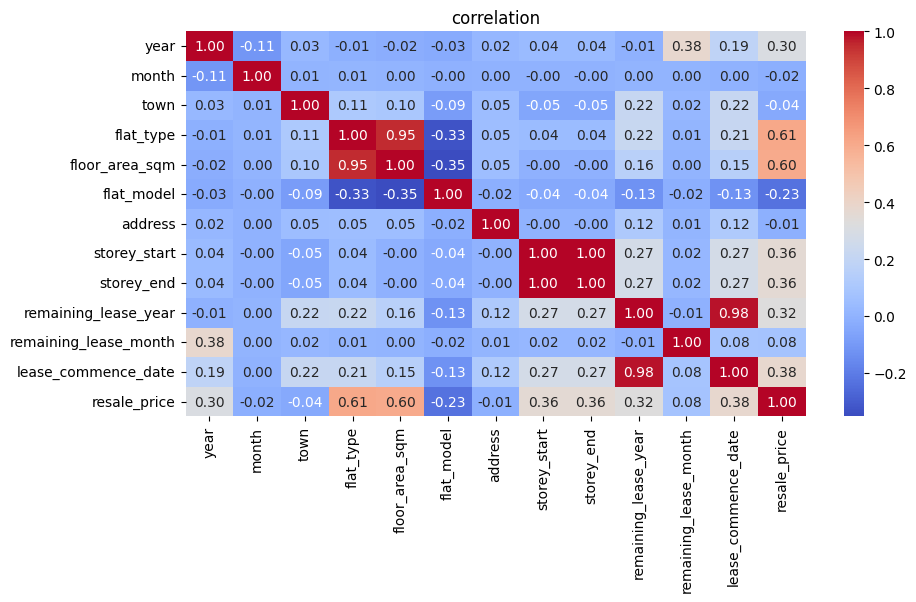

In [123]:
# ckecking correlation

df_3_corr = df_3.corr()
plt.figure(figsize=(10, 5))
sns.heatmap(df_3_corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('correlation')
plt.show()

##### flat_type and floor_area_sqm (0.95): This high positive correlation suggests that the type of flat is strongly associated with its floor area,
##### Features like address and month have low or negligible correlation with most other variables.

## Tuning the skewness

In [124]:
df_4 = pd.read_csv(r'C:\Users\Santhosh\Desktop\CapstoneProject\Capstone\Resale price prediction\Resale_flat_price.csv')
df_4

,year,month,town,flat_type,floor_area_sqm,flat_model,address,storey_start,storey_end,remaining_lease_year,remaining_lease_month,lease_commence_date,resale_price
0,2015,1,0,2,60.0,5,1598,7,9,70,0,1986,255000.0
1,2015,1,0,2,68.0,12,6562,1,3,65,0,1981,275000.0
2,2015,1,0,2,69.0,12,1430,1,3,64,0,1980,285000.0
3,2015,1,0,2,68.0,12,5400,1,3,63,0,1979,290000.0
4,2015,1,0,2,68.0,12,6717,7,9,64,0,1980,290000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
218410,2024,6,25,4,112.0,5,6041,10,12,92,8,2018,738000.0
218411,2024,6,25,4,122.0,5,9075,7,9,62,10,1988,680000.0
218412,2024,6,25,5,146.0,7,8268,10,12,61,0,1986,790000.0
218413,2024,6,25,5,146.0,7,8852,10,12,62,8,1988,1000000.0


#### Removing the duplicate values

In [125]:
# Removing duplicate values for skewness data quality
df_4.duplicated().sum()

312

In [126]:
df_5 = df_4.drop_duplicates()
df_5.reset_index(drop=True, inplace=True)
df_5

,year,month,town,flat_type,floor_area_sqm,flat_model,address,storey_start,storey_end,remaining_lease_year,remaining_lease_month,lease_commence_date,resale_price
0,2015,1,0,2,60.0,5,1598,7,9,70,0,1986,255000.0
1,2015,1,0,2,68.0,12,6562,1,3,65,0,1981,275000.0
2,2015,1,0,2,69.0,12,1430,1,3,64,0,1980,285000.0
3,2015,1,0,2,68.0,12,5400,1,3,63,0,1979,290000.0
4,2015,1,0,2,68.0,12,6717,7,9,64,0,1980,290000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
218098,2024,6,25,4,112.0,5,6041,10,12,92,8,2018,738000.0
218099,2024,6,25,4,122.0,5,9075,7,9,62,10,1988,680000.0
218100,2024,6,25,5,146.0,7,8268,10,12,61,0,1986,790000.0
218101,2024,6,25,5,146.0,7,8852,10,12,62,8,1988,1000000.0


In [127]:
df_6 = df_5.drop(columns=['address','month'])
df_6

,year,town,flat_type,floor_area_sqm,flat_model,storey_start,storey_end,remaining_lease_year,remaining_lease_month,lease_commence_date,resale_price
0,2015,0,2,60.0,5,7,9,70,0,1986,255000.0
1,2015,0,2,68.0,12,1,3,65,0,1981,275000.0
2,2015,0,2,69.0,12,1,3,64,0,1980,285000.0
3,2015,0,2,68.0,12,1,3,63,0,1979,290000.0
4,2015,0,2,68.0,12,7,9,64,0,1980,290000.0
...,...,...,...,...,...,...,...,...,...,...,...
218098,2024,25,4,112.0,5,10,12,92,8,2018,738000.0
218099,2024,25,4,122.0,5,7,9,62,10,1988,680000.0
218100,2024,25,5,146.0,7,10,12,61,0,1986,790000.0
218101,2024,25,5,146.0,7,10,12,62,8,1988,1000000.0


## Detecting skewness

In [128]:
# Detecting skewness

def plot(df, columns):
    plt.figure(figsize=(15,4))
    plt.subplot(1,3,1)
    sns.distplot(df[columns])
    plt.title('Distplot for '+' '+columns)

    plt.subplot(1,3,2)
    sns.histplot(df, x=columns, kde=True, bins=30, color='orange')
    plt.title('Histrogram plot for '+' '+columns)

    plt.subplot(1,3,3)
    sns.boxplot(df, x=columns)
    plt.title('Boxplott for '+' '+columns)

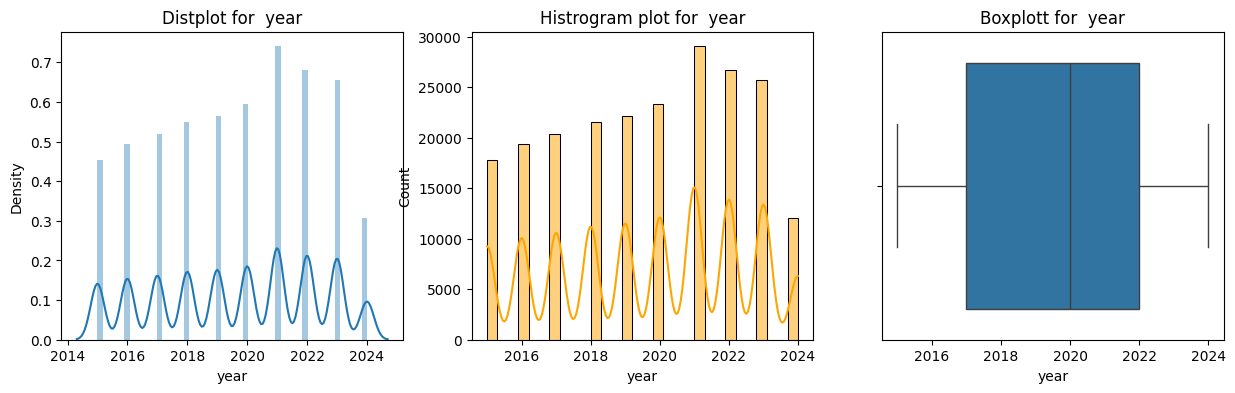

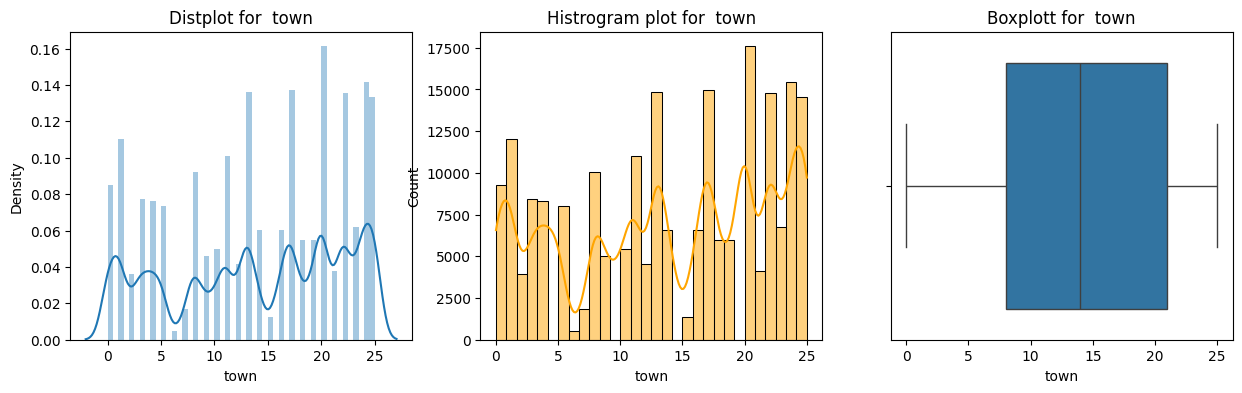

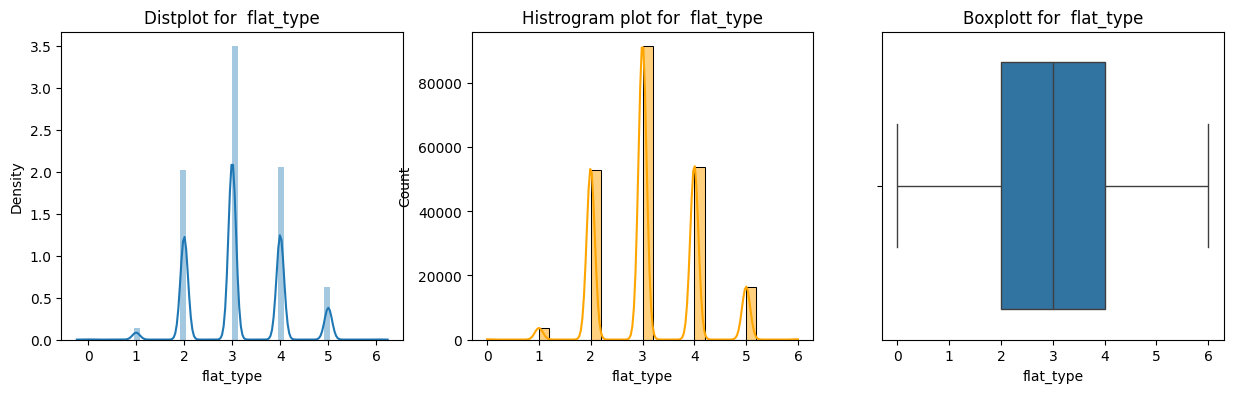

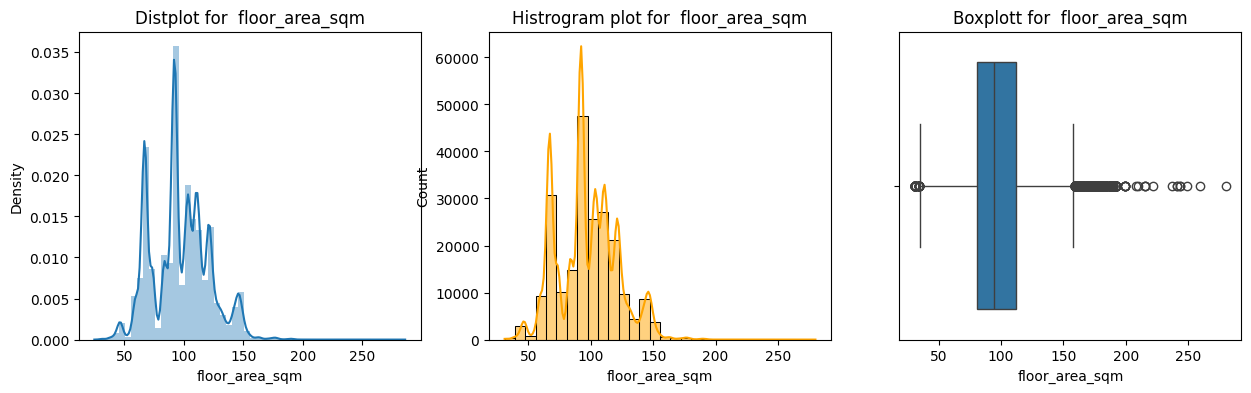

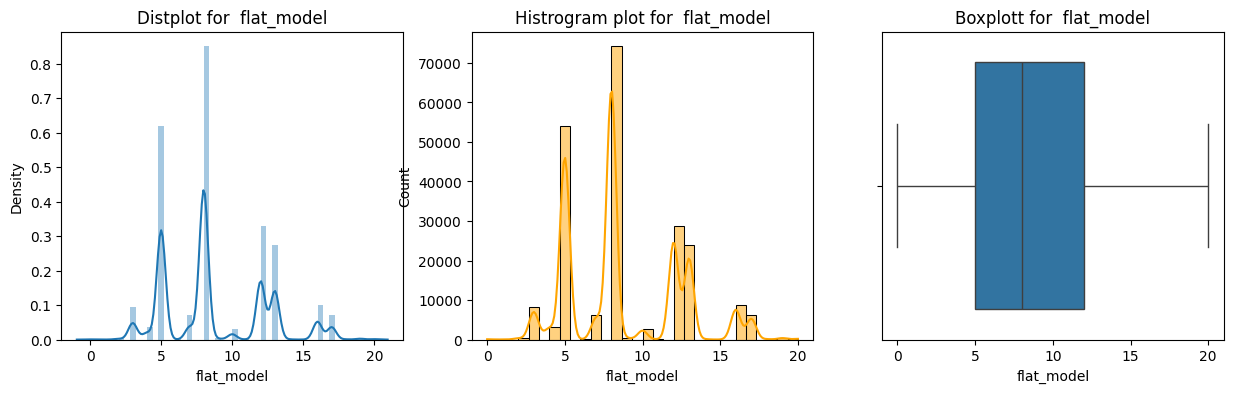

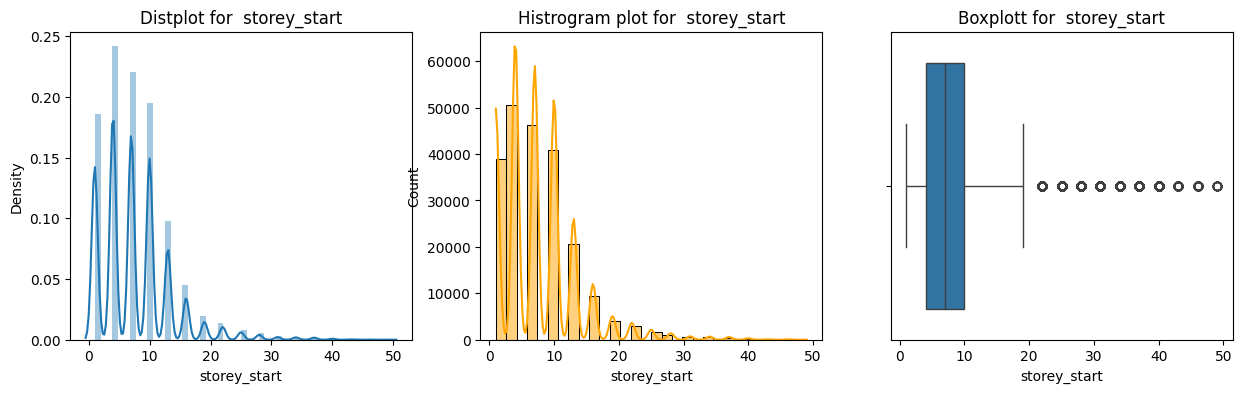

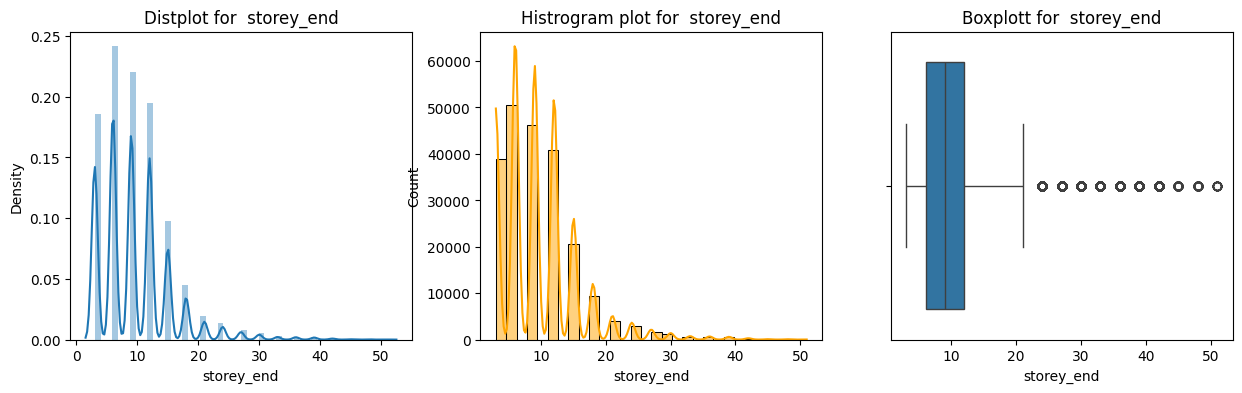

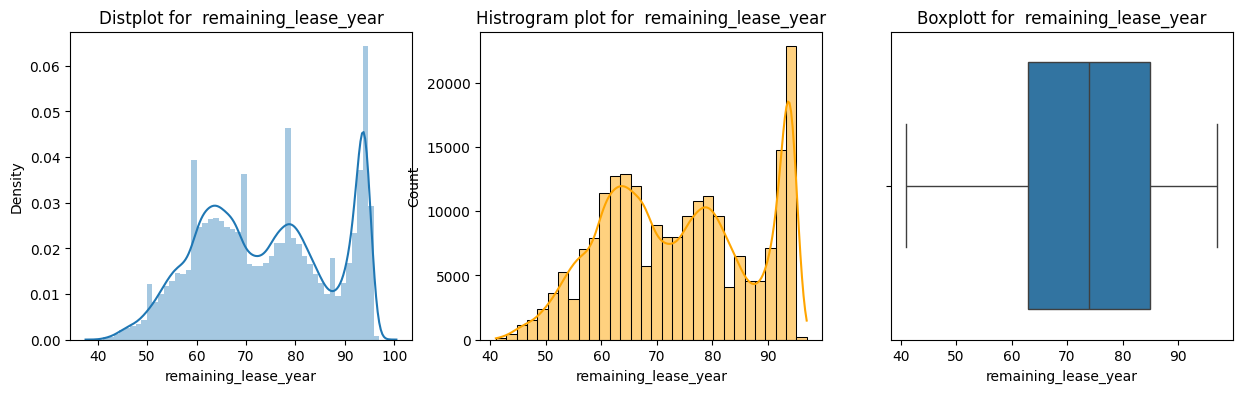

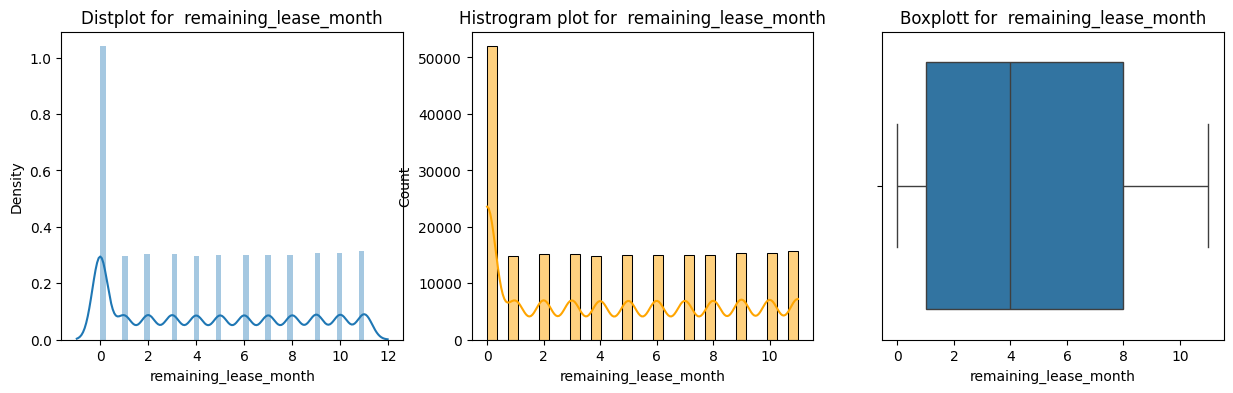

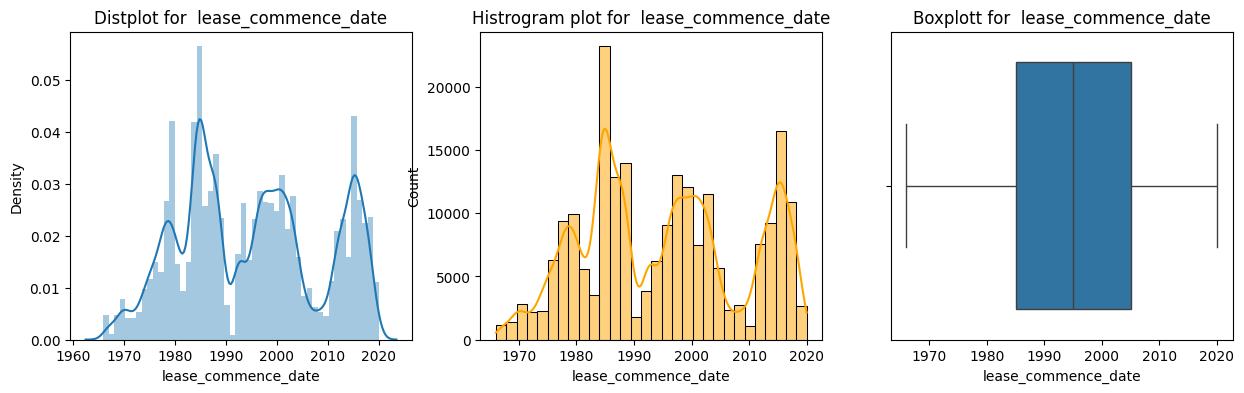

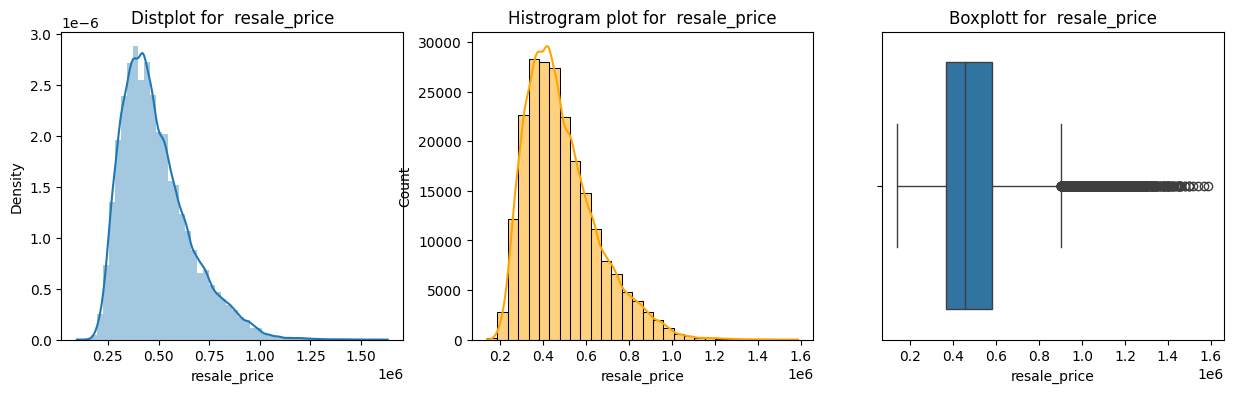

In [129]:
for i in df_6.columns:
    plot(df_6, i)

In [130]:
# skewed columns (negative)
df_6['storey_start']= np.log(df_6['storey_start'])
df_6['storey_end']= np.log(df_6['storey_end'])
df_6['resale_price']= np.log(df_6['resale_price'])

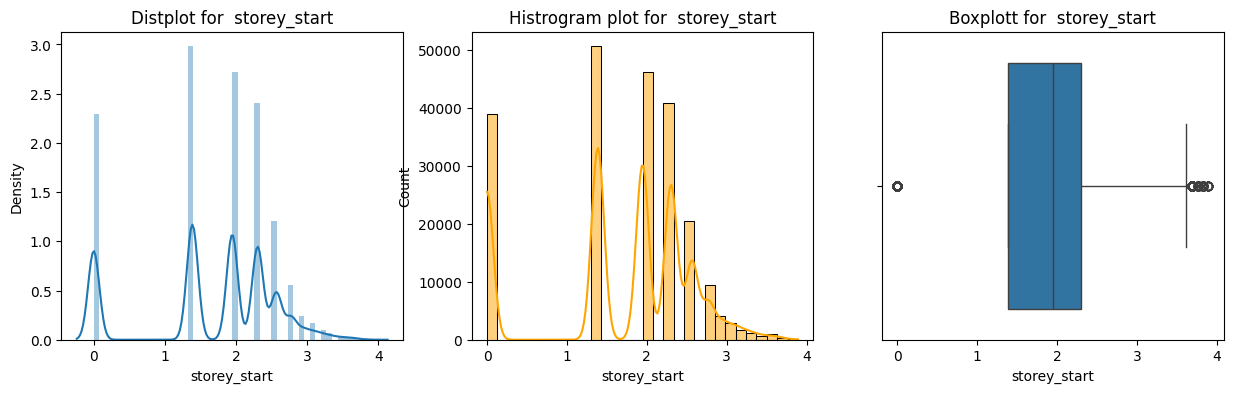

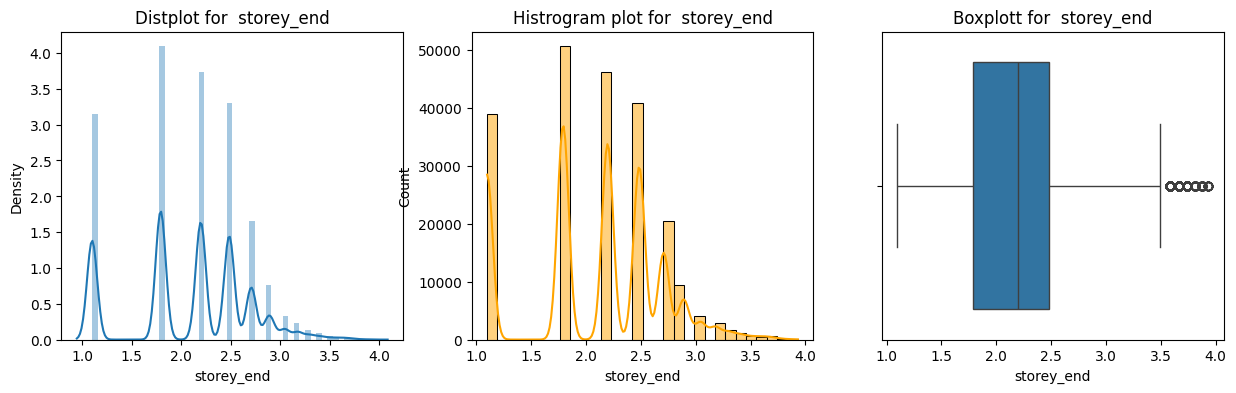

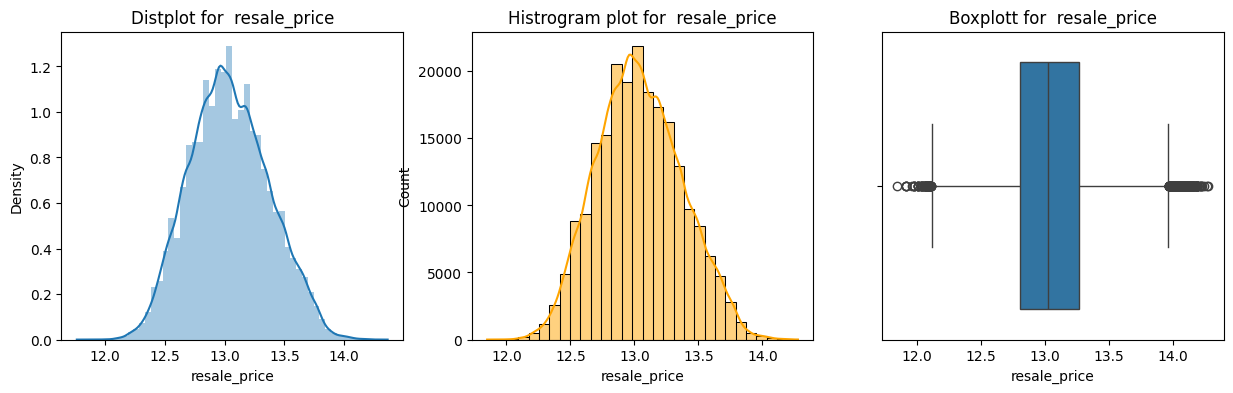

In [131]:
skewed_colums = ['storey_start','storey_end','resale_price']
for i in skewed_colums:
    plot(df_6, i)

## Outliers Handling

In [132]:
df_7= df_6.copy()


In [133]:
df_7.dtypes

year                       int64
town                       int64
flat_type                  int64
floor_area_sqm           float64
flat_model                 int64
storey_start             float64
storey_end               float64
remaining_lease_year       int64
remaining_lease_month      int64
lease_commence_date        int64
resale_price             float64
dtype: object

##### Handling the outliers by use the IQR.

In [134]:
# handling outliers
def outliers(df, column):
    q1=df[column].quantile(0.25)
    q3=df[column].quantile(0.75)

    iqr = q3-q1

    upper_thershold = q3+(1.5*iqr)
    lower_thershold = q1-(1.5*iqr)

    df[column] = df[column].clip(lower_thershold, upper_thershold)

In [135]:
outliers_columns = ['floor_area_sqm','storey_start','storey_end','resale_price']
for i in outliers_columns:
    outliers(df_7, i)

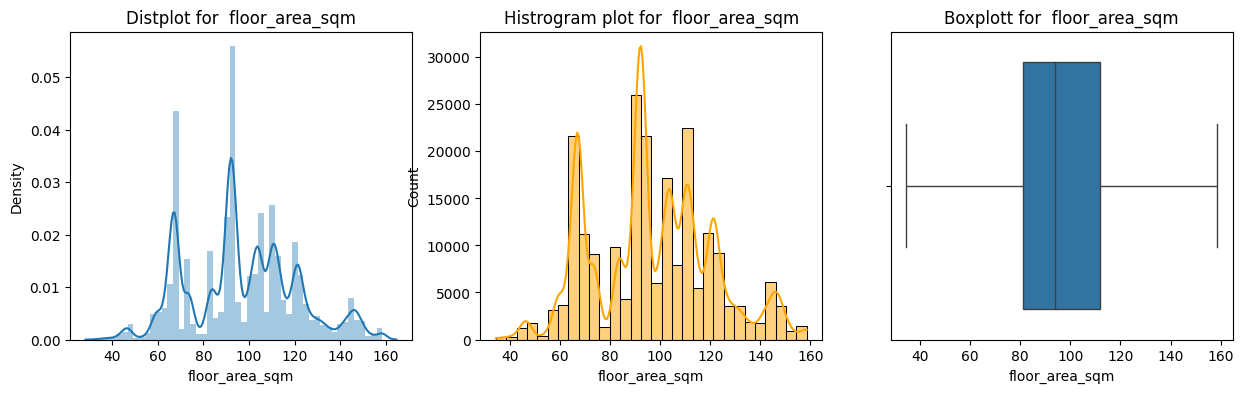

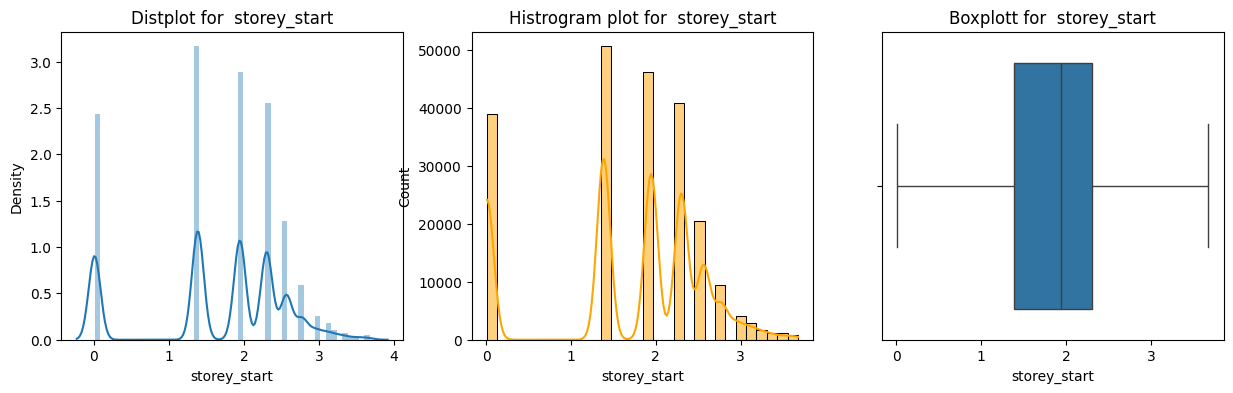

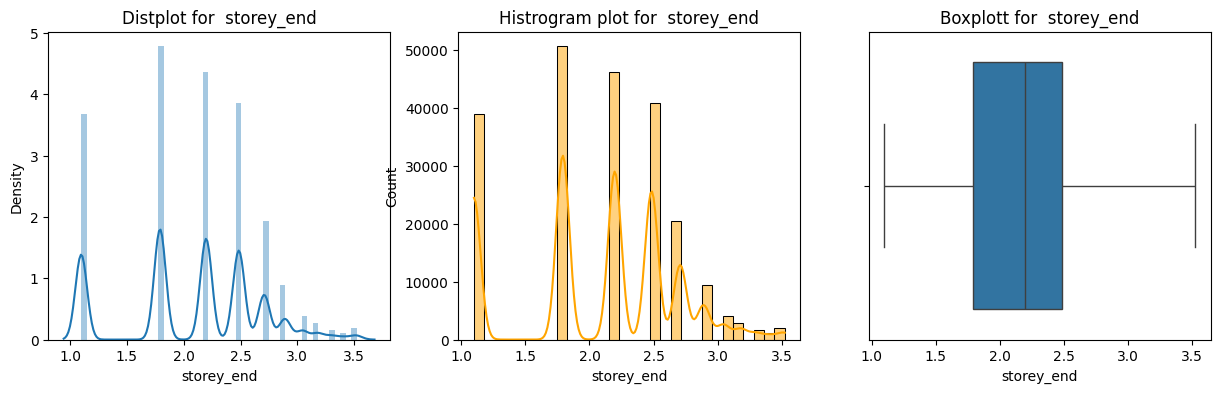

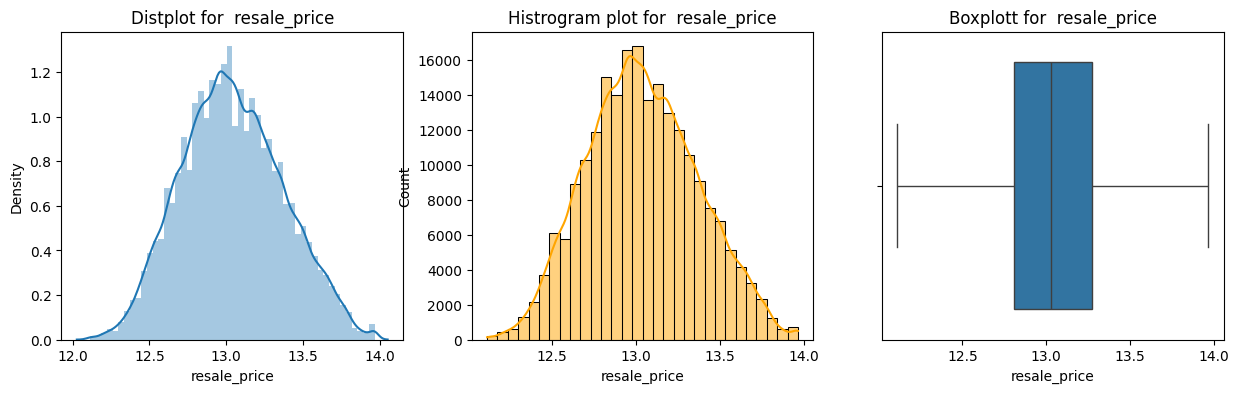

In [136]:
for i in outliers_columns:
    plot(df_7, i)

##### After removing the outliers, the distribution are normalized.

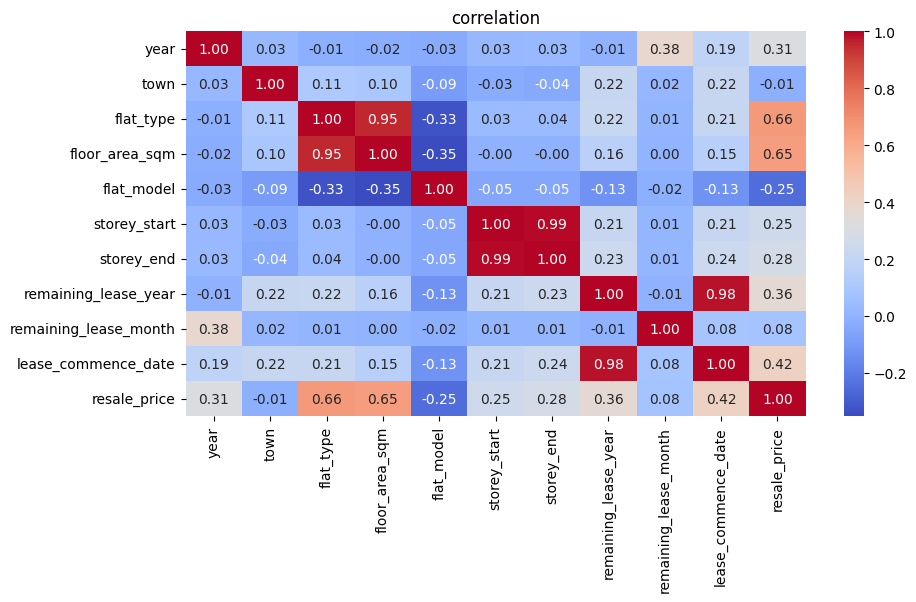

In [137]:
#Checking the corrolation after elimaniting the skewness and outliers

df_7_corr = df_7.corr()
plt.figure(figsize=(10, 5))
sns.heatmap(df_7_corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('correlation')
plt.show()

# Model selection 

In [138]:
df_8 = df_7.copy()

In [139]:
df_8.describe().T

,count,mean,std,min,25%,50%,75%,max
year,218103.0,2019.612724,2.686280,2015.000000,2017.000000,2020.000000,2022.000000,2024.000000
town,218103.0,13.892647,7.956311,0.000000,8.000000,14.000000,21.000000,25.000000
flat_type,218103.0,3.120842,0.919426,0.000000,2.000000,3.000000,4.000000,6.000000
floor_area_sqm,218103.0,97.062067,23.828243,34.500000,81.000000,94.000000,112.000000,158.500000
flat_model,218103.0,8.690426,3.646396,0.000000,5.000000,8.000000,12.000000,20.000000
storey_start,218103.0,1.695464,0.920853,0.011858,1.386294,1.945910,2.302585,3.677021
storey_end,218103.0,2.093274,0.601249,1.098612,1.791759,2.197225,2.484907,3.524627
remaining_lease_year,218103.0,74.096230,13.479910,41.000000,63.000000,74.000000,85.000000,97.000000
remaining_lease_month,218103.0,4.602142,3.782002,0.000000,1.000000,4.000000,8.000000,11.000000
lease_commence_date,218103.0,1995.143102,13.684797,1966.000000,1985.000000,1995.000000,2005.000000,2020.000000


### Algorithms

In [140]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
import pickle

#### Train the train and test models

In [141]:
# train test split for model selection

def select_model(df, algorithm):
    x= df.drop(columns=['resale_price'])
    y= df['resale_price'] 

    X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=0.2, random_state=42)

    model = algorithm().fit(X_train, Y_train)
    y_pred_train= model.predict(X_train)
    y_pred_test= model.predict(X_test)

# checking the accuracy score

    train_mse = mean_squared_error(Y_train, y_pred_train)
    train_rmes = np.sqrt(train_mse)
    train_mae = mean_absolute_error(Y_train, y_pred_train)
    train_r2 = r2_score(Y_train, y_pred_train)

    test_mse = mean_squared_error(Y_test, y_pred_test)
    test_rmes = np.sqrt(test_mse)
    test_mae = mean_absolute_error(Y_test, y_pred_test)
    test_r2 = r2_score(Y_test, y_pred_test)

    metrics_train = {'Data':'Train Data',
                     'Name': algorithm.__name__,
                     'R2_score':train_r2,
                     'Mean_squared_error': train_mse,
                     'Root_Mean_squared_error': train_rmes,
                     'Mean_absolute_error': train_mae}
    
    metrics_test = {'Data':'Test Data',
                     'Name': algorithm.__name__,
                     'R2_score':test_r2,
                     'Mean_squared_error': test_mse,
                     'Root_Mean_squared_error': test_rmes,
                     'Mean_absolute_error': test_mae}
    
    print(metrics_train)
    print(metrics_test)
    print('')

In [142]:
select_model(df_8, LinearRegression)
select_model(df_8, DecisionTreeRegressor)
select_model(df_8, RandomForestRegressor)
select_model(df_8, AdaBoostRegressor)
select_model(df_8, ExtraTreesRegressor)
select_model(df_8, GradientBoostingRegressor)
select_model(df_8, XGBRegressor)


{'Data': 'Train Data', 'Name': 'LinearRegression', 'R2_score': 0.6744575447681964, 'Mean_squared_error': 0.03574225094522034, 'Root_Mean_squared_error': 0.1890562110728456, 'Mean_absolute_error': 0.14795943213438173}
{'Data': 'Test Data', 'Name': 'LinearRegression', 'R2_score': 0.6782340258642275, 'Mean_squared_error': 0.035407469953260426, 'Root_Mean_squared_error': 0.18816872735197107, 'Mean_absolute_error': 0.14734973448959088}

{'Data': 'Train Data', 'Name': 'DecisionTreeRegressor', 'R2_score': 0.9962216578567346, 'Mean_squared_error': 0.0004148351493673438, 'Root_Mean_squared_error': 0.02036750228592951, 'Mean_absolute_error': 0.007256910800851017}
{'Data': 'Test Data', 'Name': 'DecisionTreeRegressor', 'R2_score': 0.9252456935142878, 'Mean_squared_error': 0.008226043377889323, 'Root_Mean_squared_error': 0.09069753788217916, 'Mean_absolute_error': 0.06452215996445834}

{'Data': 'Train Data', 'Name': 'RandomForestRegressor', 'R2_score': 0.9911510351562155, 'Mean_squared_error': 0.00

#### The accuracy of test and tarin is high in the RandomForestRegression, so we can use the same algorithm.

### Apply the train and test model in the RandomForestRegression algorithm to predict the resale value.

In [143]:
x= df_8.drop(columns=['resale_price'])
y= df_8['resale_price'] 

X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=0.2, random_state=42)

model_regg = RandomForestRegressor().fit(X_train, Y_train)
y_pred_test= model_regg.predict(X_test)

test_mse = mean_squared_error(Y_test, y_pred_test)
test_rmes = np.sqrt(test_mse)
test_mae = mean_absolute_error(Y_test, y_pred_test)
test_r2 = r2_score(Y_test, y_pred_test)

metrics_test = {'Data':'Test Data',
                     'Name': RandomForestRegressor.__name__,
                     'R2_score':test_r2,
                     'Mean_squared_error': test_mse,
                     'Root_Mean_squared_error': test_rmes,
                     'Mean_absolute_error': test_mae}
    


print(metrics_test)


{'Data': 'Test Data', 'Name': 'RandomForestRegressor', 'R2_score': 0.955081204310167, 'Mean_squared_error': 0.004942912043438428, 'Root_Mean_squared_error': 0.0703058464385319, 'Mean_absolute_error': 0.05164919616547681}


In [145]:
df_8.iloc[218098]

year                     2024.000000
town                       25.000000
flat_type                   4.000000
floor_area_sqm            112.000000
flat_model                  5.000000
storey_start                2.302585
storey_end                  2.484907
remaining_lease_year       92.000000
remaining_lease_month       8.000000
lease_commence_date      2018.000000
resale_price               13.511699
Name: 218098, dtype: float64

In [146]:
np.exp(13.511699)

737999.9235560382

In [147]:
user_data = np.array([[2024,25,4,112,5,2.303585,2.484907,92,8,2018,]])
y_pred_1 = model_regg.predict(user_data)
y_pred_1[0]

13.510329045952616

In [148]:
np.exp(13.512055015865535)

738262.7100128859

### Save the Regression model for future use.

In [149]:
#using pickle to save the model

with open("ResaleFlatPricesPrediction_model_1.pkl","wb") as f:
    pickle.dump(model_regg,f)

In [150]:
with open("ResaleFlatPricesPrediction_model_1.pkl","rb") as f1:
    regg_model=pickle.load(f1)

In [153]:
user_data = np.array([[2015,0,2,68,12,7,9,64,0,1980,]])
y_pred_1 = regg_model.predict(user_data)
y_pred_1[0]

12.680464805879199

In [154]:
np.exp(12.685718437972268)

323100.4155584593